<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRI  (Principio de relevancia de informacion)**
###  **Parte 1**
En esta seccion se derrolla el metodo del PRI con las siguientes metodologias, teniendo en cuenta la formula del PRI que está determinada por:
\
$$ L[p(X/X_{o})]= H_{2}(X)+\lambda D_{cs}(X,X_{o}) $$
\
minimizando $L$ respecto $X$ se tiene:\
\
$$ J(X)=min_{x}[H_{2}(X)+ \lambda (2H_{2}(X,X_{o})-H_{2}(X)-H(X_{o}))]$$
\
dado que $H_{2}(X_{o})$ es constante se tiene  
\
$$ J(X)=min_{x}[(1-\lambda)H_{2}(X)+2\lambda H_{2}(X,X_{o})]$$ 
\
Antes de realizar la minimizacion se analizan los posibles valores de $\lambda$ siendo de interes el rango comprendido para $1<\lambda<\infty$ , por tanto, se procede con la minimizacion dependiendo de los siguientes casos
\
$$J(X)=-(1-\lambda)log(V(X))-2\lambda log(V(X,X_{o}))$$
\
$$ J(X)= min_{x}[-(1-\lambda)\log(\frac{1}{N^{2}}\sum_{i=1}^{N}\sum_{j=1}^{N}G_{\sigma}(x_{i}-x_{j} ))-2\lambda\log(\frac{1}{NN_{o}}\sum_{i=1}^{N}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{i}-x_{oj})]$$
\
$$\frac{d J(X)}{dx_{k}}=\frac{2(1-\lambda)}{V(X)}F(x_{k})+\frac{2}{V(X,X_{o})}F(x,X_{o})=0$$
\
Donde $F(x_{k})$ y $F(x,X_{o})$ estan definidos como:
\
$$F(x_{k})=\frac{-1}{N \sigma^{2}}\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})(x_{k}-x_{j})$$ 
$$F(x;X_{o})=\frac{-1}{N_{o} \sigma^{2}}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})(x_{k}-x_{oj})$$ 

1.   FP (punto Fijo)
\
Para esta metodologia se despeja la derivada en terminos de $x_{k}$, dando como resultado:
$$\frac{(1-\lambda)}{NV(X)}\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})(x_{j}-x_{k})=\frac{\lambda}{N_{o}V(X,X_{o})}\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})(x_{k}-x_{oj})$$
\
$$x_{k}(n+1)=c\frac{(1-\lambda)}{\lambda}\frac{\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})x_{j}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}+\frac{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})x_{oj}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}-c\frac{(1-\lambda)}{\lambda}\frac{\sum_{j=1}^{N}G_{\sigma}(x_{k}-x_{j})x_{k}}{\sum_{j=1}^{N_{o}}G_{\sigma}(x_{k}-x_{oj})}$$
\
Donde el parametro $c$ corresponde a:
\
\
$c=\frac{N_{o}V(X,X_{o})}{NV(X)}$ 

2.   SGD (Gradiente descendiente estocastico)
\
Para esta metogologia el calculo de $x_{k+1}$ esta dado por:
\
$$x_{k+1}=x_{k}-\gamma \frac{d J(X)}{dx_{k}}$$
\
$$x_{k+1}=x_{k}-\gamma( \frac{2(1-\lambda)}{V(X)}F(x_{k})+\frac{2}{V(X,X_{o})}F(x,X_{o}))$$
3.   SGD por mini lotes





**Sincronizar el cuaderno de python con el github**

In [1]:
!rm -r PRI
!git clone https://github.com/Bryan0122/PRI.git

Cloning into 'PRI'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 84 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (84/84), done.


**Importar el directorio de el repositorio sincronizado**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Importar las librerias necesarias**

In [0]:
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, SpectralClustering
from main_functions import PRI,MiniBatchPRI,spectralClustering
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin


**Cargar las bases de datos**

In [0]:
data=sio.loadmat(DB)['DB'][0,0]
be_2=data['be2']
sc=SpectralClustering(n_clusters=2,n_neighbors=5,gamma = 1000)
sc.fit(be_2)
labels_be2=sc.labels_
be_3=data['be3']
sc=SpectralClustering(n_clusters=3,n_neighbors=5,gamma = 1000)
sc.fit(be_3)
labels_be3=sc.labels_
happy=data['happy']
sc=SpectralClustering(n_clusters=3,n_neighbors=5,gamma = 1000)
sc.fit(happy)
labels_happy=sc.labels_
moons,labels_moons = datasets.make_moons(n_samples=300, noise=.05)

**Graficar las bases de datos**

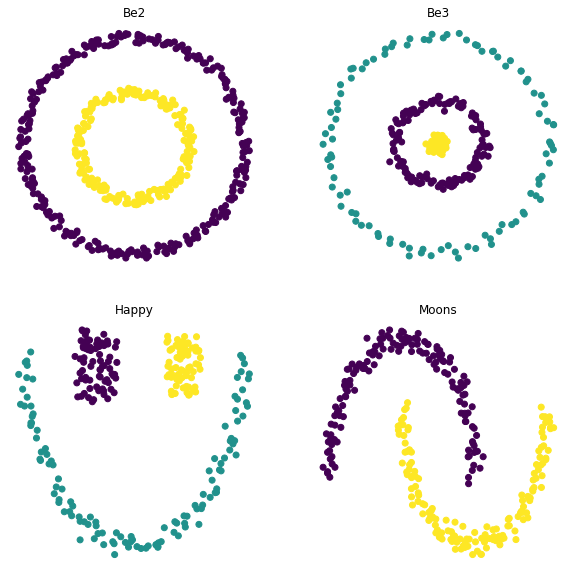

In [5]:
plt.figure(figsize=(10,10))
# BE2
ax1=plt.subplot(221)
ax1=plt.scatter(be_2[:,0],be_2[:,1],c=labels_be2)
ax1=plt.title('Be2')
ax1=plt.axis('off')
# BE3
ax1=plt.subplot(222)
ax1=plt.scatter(be_3[:,0],be_3[:,1],c=labels_be3)
ax1=plt.title('Be3')
ax1=plt.axis('off')
# Happy
ax2=plt.subplot(223)
ax2=plt.scatter(happy[:,0],happy[:,1],c=labels_happy)
ax2=plt.title('Happy')
ax2=plt.axis('off')
# Moons
ax3=plt.subplot(224)
ax3=plt.scatter(moons[:,0],moons[:,1],c=labels_moons)
ax3=plt.title('Moons')
ax3=plt.axis('off')
plt.show()

**Seleccion de mejores parametros PRI**

In [6]:
# Variables para guardar parametros y puntajes

params_fp_ars=[]
scores_fp_ars=[]
Bscores_fp_ars=[]

for X,labels,n_clusters in [[be_2,labels_be2,2],[be_3,labels_be3,3],[happy,labels_happy,3],[moons,labels_moons,2]]:

  # Configurar parametros
  grid={'lambda_' :[ 15, 30,35,40, 50],'sigma_initial':[10,15,25,35,40,70],'n_groups':[n_clusters],'method':['FP']}

  # Primer score
  grid_pri_ars=GridSearchCV(PRI(reduction_=True),param_grid=grid, cv=5, scoring='adjusted_rand_score',verbose=1,n_jobs=-1)
  grid_pri_ars.fit(X,labels)

  params_fp_ars.append(grid_pri_ars.best_params_)
  scores_fp_ars.append(grid_pri_ars.cv_results_)
  Bscores_fp_ars.append(grid_pri_ars.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.9min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.4min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.3min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.8min finished


**Seleccion de mejores parametros SGD**

In [7]:
# Variables para guardar parametros y puntajes

params_sgd_ars=[]
scores_sgd_ars=[]
Bscores_sgd_ars=[]

for X,labels,n_clusters in [[be_2,labels_be2,2],[be_3,labels_be3,3],[happy,labels_happy,3],[moons,labels_moons,2]]:

  # Configurar parametros
  grid={'lambda_' :[ 15, 30,35,40, 50],'sigma_initial':[10,15,25,35,40,70],'n_groups':[n_clusters],'method':['SGD'],'t0':[1],'t1':[10000]}

  # Primer score
  grid_pri_ars=GridSearchCV(PRI(reduction_=True),param_grid=grid, cv=5, scoring='adjusted_rand_score',verbose=1,n_jobs=-1)
  grid_pri_ars.fit(X,labels)

  params_sgd_ars.append(grid_pri_ars.best_params_)
  scores_sgd_ars.append(grid_pri_ars.cv_results_)
  Bscores_sgd_ars.append(grid_pri_ars.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 13.8min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.4min finished
/content/PRI/main_functions.py:213: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.3min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.4min finished


**Seleccion de mejores parametros SGD+Adam**

In [8]:
# Variables para guardar parametros y puntajes

params_sgdA_ars=[]
scores_sgdA_ars=[]
Bscores_sgdA_ars=[]

for X,labels,n_clusters in [[be_2,labels_be2,2],[be_3,labels_be3,3],[happy,labels_happy,3],[moons,labels_moons,2]]:

  # Configurar parametros
  grid={'lambda_' :[ 15, 30,35,40, 50],'sigma_initial':[10,15,25,35,40,70],'n_groups':[n_clusters],'method':['SGD']}

  # Primer score
  grid_pri_ars=GridSearchCV(PRI(reduction_=True,optimization='Adam'),param_grid=grid, cv=5, scoring='adjusted_rand_score',verbose=1,n_jobs=-1)
  grid_pri_ars.fit(X,labels)

  params_sgdA_ars.append(grid_pri_ars.best_params_)
  scores_sgdA_ars.append(grid_pri_ars.cv_results_)
  Bscores_sgdA_ars.append(grid_pri_ars.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 13.1min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.2min finished
/content/PRI/main_functions.py:213: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.5min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.3min finished


**Seleccion de mejores parametros SGD+Nadam**

In [0]:
# Variables para guardar parametros y puntajes

params_sgdN_ars=[]
scores_sgdN_ars=[]
Bscores_sgdN_ars=[]

for X,labels,n_clusters in [[be_2,labels_be2,2],[be_3,labels_be3,3],[happy,labels_happy,3],[moons,labels_moons,2]]:

  # Configurar parametros
  grid={'lambda_' :[ 15, 30,35,40, 50],'sigma_initial':[10,15,25,35,40,70],'n_groups':[n_clusters],'method':['SGD']}

  # Primer score
  grid_pri_ars=GridSearchCV(PRI(reduction_=True,optimization='Nadam'),param_grid=grid, cv=5, scoring='adjusted_rand_score',verbose=1,n_jobs=-1)
  grid_pri_ars.fit(X,labels)

  params_sgdN_ars.append(grid_pri_ars.best_params_)
  scores_sgdN_ars.append(grid_pri_ars.cv_results_)
  Bscores_sgdN_ars.append(grid_pri_ars.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 13.1min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.3min finished
/content/PRI/main_functions.py:213: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.6min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


**Seleccion de mejores parametros MiniBatch**

In [0]:
params_MB_ars=[]
scores_MB_ars=[]
Bscores_MB_ars=[]

for X,labels,n_clusters in [[be_2,labels_be2,2],[be_3,labels_be3,3],[happy,labels_happy,3],[moons,labels_moons,2]]:

  # Configurar parametros
  grid={'lambda_' :[ 15, 30,35,40, 50],'sigma_initial':[10,15,25,35,40,70],'n_groups':[n_clusters],'method':['SGD'],'minibatch_size':[8,16,32,64,128]}

  # Primer score
  grid_pri_ars=GridSearchCV(MiniBatchPRI(reduction_=True),param_grid=grid, cv=5, scoring='adjusted_rand_score',verbose=1,n_jobs=-1)
  grid_pri_ars.fit(X,labels)

  params_MB_ars.append(grid_pri_ars.best_params_)
  scores_MB_ars.append(grid_pri_ars.cv_results_)
  Bscores_MB_ars.append(grid_pri_ars.best_score_)

**Seleccion de mejores parametros MiniBatch+Adam**

In [0]:
params_MBA_ars=[]
scores_MBA_ars=[]
Bscores_MBA_ars=[]

for X,labels,n_clusters in [[be_2,labels_be2,2],[be_3,labels_be3,3],[happy,labels_happy,3],[moons,labels_moons,2]]:

  # Configurar parametros
  grid={'lambda_' :[ 15, 30,35,40, 50],'sigma_initial':[10,15,25,35,40,70],'n_groups':[n_clusters],'method':['SGD'],'minibatch_size':[8,16,32,64,128]}

  # Primer score
  grid_pri_ars=GridSearchCV(MiniBatchPRI(reduction_=True,optimization='Adam'),param_grid=grid, cv=5, scoring='adjusted_rand_score',verbose=1,n_jobs=-1)
  grid_pri_ars.fit(X,labels)

  params_MBA_ars.append(grid_pri_ars.best_params_)
  scores_MBA_ars.append(grid_pri_ars.cv_results_)
  Bscores_MBA_ars.append(grid_pri_ars.best_score_)

**Seleccion de mejores parametros MiniBatch+Nadam**

In [0]:
params_MBN_ars=[]
scores_MBN_ars=[]
Bscores_MBN_ars=[]

for X,labels,n_clusters in [[be_2,labels_be2,2],[be_3,labels_be3,3],[happy,labels_happy,3],[moons,labels_moons,2]]:

  # Configurar parametros
  grid={'lambda_' :[ 15, 30,35,40, 50],'sigma_initial':[10,15,25,35,40,70],'n_groups':[n_clusters],'method':['SGD'],'minibatch_size':[8,16,32,64,128]}

  # Primer score
  grid_pri_ars=GridSearchCV(MiniBatchPRI(reduction_=True,optimization='Nadam'),param_grid=grid, cv=5, scoring='adjusted_rand_score',verbose=1,n_jobs=-1)
  grid_pri_ars.fit(X,labels)

  params_MBN_ars.append(grid_pri_ars.best_params_)
  scores_MBN_ars.append(grid_pri_ars.cv_results_)
  Bscores_MBN_ars.append(grid_pri_ars.best_score_)

**Resultados obtenidos**

In [15]:
R=[['fp',params_fp_ars,Bscores_fp_ars],['sgd',params_sgd_ars,Bscores_sgd_ars],['sgd+Adam',params_sgdA_ars,Bscores_sgdA_ars],['sgd+Nadam',params_sgdN_ars,Bscores_sgdN_ars],['MiniBatch',params_MB_ars,Bscores_sgd_ars],['MiniBatch+Adam',params_MBA_ars,Bscores_sgdA_ars],['MiniBatch+adam',params_MBN_ars,Bscores_sgdN_ars]]
for meth,bp,bs in R :
  print('los parametros recomendados para '+meth+' son:')
  print(bp)
  print('con puntaje:')
  print(bs)

los parametros recomendados para fp son:
[{'lambda_': 15, 'method': 'FP', 'n_groups': 2, 'sigma_initial': 10}, {'lambda_': 40, 'method': 'FP', 'n_groups': 3, 'sigma_initial': 40}, {'lambda_': 40, 'method': 'FP', 'n_groups': 3, 'sigma_initial': 25}, {'lambda_': 30, 'method': 'FP', 'n_groups': 2, 'sigma_initial': 35}]
con puntaje:
[0.0, 0.2856807138993992, 0.18697270580185568, 0.17237695719611182]
los parametros recomendados para sgd son:
[{'lambda_': 15, 'method': 'SGD', 'n_groups': 2, 'sigma_initial': 10, 't0': 1, 't1': 10000}, {'lambda_': 50, 'method': 'SGD', 'n_groups': 3, 'sigma_initial': 15, 't0': 1, 't1': 10000}, {'lambda_': 35, 'method': 'SGD', 'n_groups': 3, 'sigma_initial': 40, 't0': 1, 't1': 10000}, {'lambda_': 40, 'method': 'SGD', 'n_groups': 2, 'sigma_initial': 35, 't0': 1, 't1': 10000}]
con puntaje:
[0.0, 0.02382930614385508, 0.19773015174908637, 0.12739286780073084]
los parametros recomendados para sgd+Adam son:
[{'lambda_': 15, 'method': 'SGD', 'n_groups': 2, 'sigma_initi